<a href="https://colab.research.google.com/github/ShadowLilly19/Capstone-911-Emergency-Call-Analysis/blob/main/Copy_of_Data_2365_Sp25_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: 911 Emergency Call Data Analysis

In this project, you'll explore and analyze 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). This dataset contains records of emergency calls and includes various details that you'll use to uncover patterns, trends, and insights.

## Dataset Features

- **lat**: Latitude (string)
- **lng**: Longitude (string)
- **desc**: Description of the emergency call (string)
- **zip**: Zip code (string)
- **title**: Title of the call (string)
- **timeStamp**: Date and time in the format `YYYY-MM-DD HH:MM:SS` (string)
- **twp**: Township where the call was made (string)
- **addr**: Address of the call (string)
- **e**: Dummy variable (always 1)

Follow the instructions and answer the **bolded questions** throughout the notebook using your Python and data analysis skills. Your goal is to clean, explore, and visualize the data to extract meaningful insights.


## Data and Setup

**Import numpy and pandas**

In [ ]:
import numpy as np
import pandas as pd

**Import visualization libraries, matplotlib and seaborn**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the csv file using the following raw link and save as dataframe called df**  

https://raw.githubusercontent.com/m-rafiul-islam/uiw-ds/main/911.csv

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [79]:
url  = 'https://raw.githubusercontent.com/m-rafiul-islam/uiw-ds/main/911.csv'
df= pd.read_csv(url)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


**Check the info() of the dataframe**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Basic Questions

The following code finds the top 5 zipcodes for 911 calls?

In [39]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


Now, I want you to compute the same using an alternative way.

Hints: df.groupby('zip').size().something_here.head(5)

In [49]:
df.groupby('zip').size().head(5)

,0
zip,
17752.0,1
18036.0,2
18041.0,414
18054.0,326
18056.0,6


**What are the top 5 townships (twp) for 911 calls?**

In [45]:
df.groupby('twp').size().head(5)

,0
twp,
ABINGTON,5977
AMBLER,601
BERKS COUNTY,284
BRIDGEPORT,555
BRYN ATHYN,173


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [50]:
title = df['title'].unique()
len(title)

110

**What are those title code?**

In [56]:
title


array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

**Make a DataFrame of those title codes.**

In [57]:
title_df = pd.DataFrame(title, columns=['Title Codes'])
title_df

,Title Codes
0,EMS: BACK PAINS/INJURY
1,EMS: DIABETIC EMERGENCY
2,Fire: GAS-ODOR/LEAK
3,EMS: CARDIAC EMERGENCY
4,EMS: DIZZINESS
...,...
105,EMS: BOMB DEVICE FOUND
106,Fire: SYNCOPAL EPISODE
107,EMS: INDUSTRIAL ACCIDENT
108,EMS: DROWNING


## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [80]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [83]:
df['Reason']

,Reason
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS
...,...
99487,Traffic
99488,Traffic
99489,EMS
99490,EMS


**What is the most common Reason for a 911 call based off of this new column?**

In [82]:
# prompt: What is the most common Reason for a 911 call based off of this new column?

df['Reason'].value_counts().head(3)


,count
Reason,
EMS,48877
Traffic,35695
Fire,14920


## Visualizations

**Use seaborn to create a countplot of 911 calls by Reason.**

<ipython-input-85-08f2b221de2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason',data=df, palette='viridis')


<Axes: xlabel='Reason', ylabel='count'>

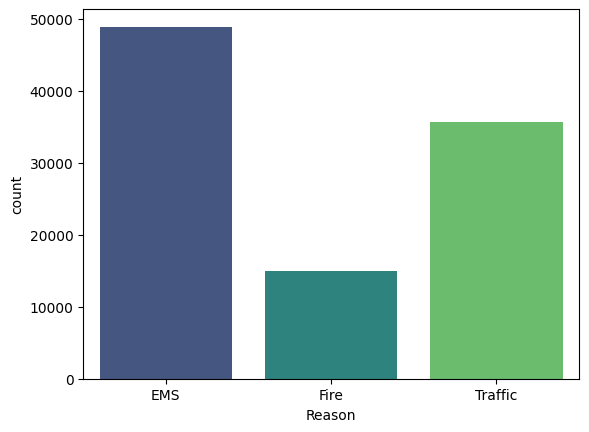

In [85]:
import seaborn as sns
sns.countplot(x='Reason',data=df, palette='viridis')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [86]:
df['timeStamp']

,timeStamp
0,2015-12-10 17:40:00
1,2015-12-10 17:40:00
2,2015-12-10 17:40:00
3,2015-12-10 17:40:01
4,2015-12-10 17:40:01
...,...
99487,2016-08-24 11:06:00
99488,2016-08-24 11:07:02
99489,2016-08-24 11:12:00
99490,2016-08-24 11:17:01


In [87]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [88]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [89]:
df['timeStamp']

,timeStamp
0,2015-12-10 17:40:00
1,2015-12-10 17:40:00
2,2015-12-10 17:40:00
3,2015-12-10 17:40:01
4,2015-12-10 17:40:01
...,...
99487,2016-08-24 11:06:00
99488,2016-08-24 11:07:02
99489,2016-08-24 11:12:00
99490,2016-08-24 11:17:01


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [90]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)


In [92]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

```python
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
```

In [93]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [94]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week']

,Day of Week
0,Thu
1,Thu
2,Thu
3,Thu
4,Thu
...,...
99487,Wed
99488,Wed
99489,Wed
99490,Wed


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

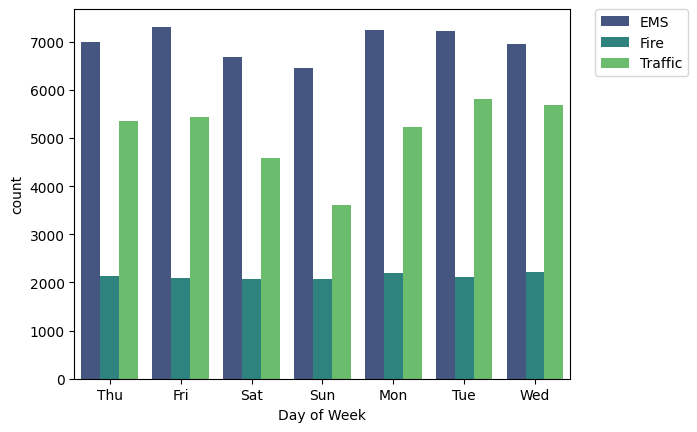

In [96]:
import seaborn as sns
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

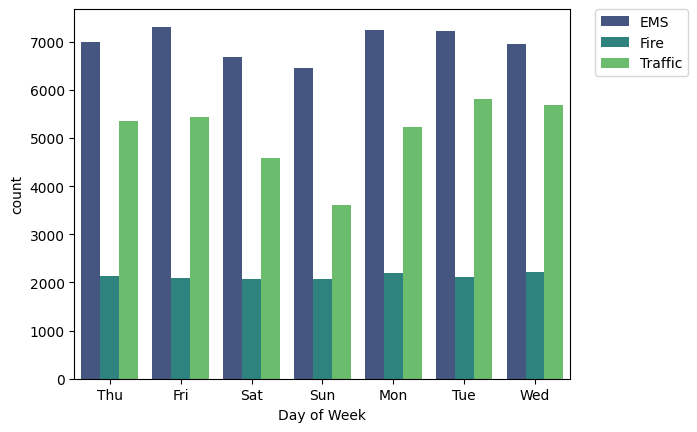

In [ ]:

# To relocate the legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

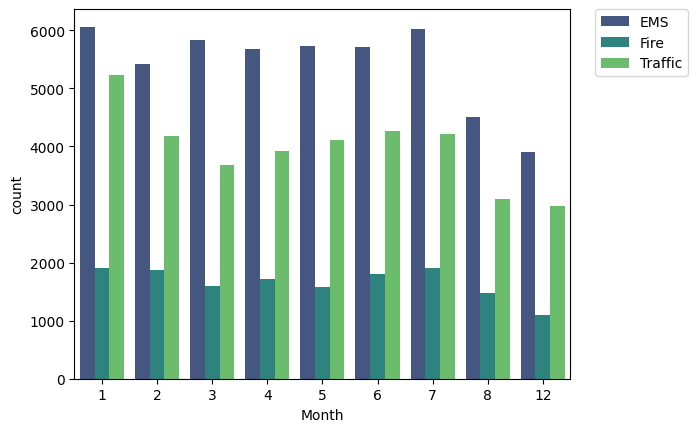

In [98]:
import seaborn as sns
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

In [ ]:
# It is missing some months! 9,10, and 11 are not there.

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [99]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<Axes: xlabel='Month'>

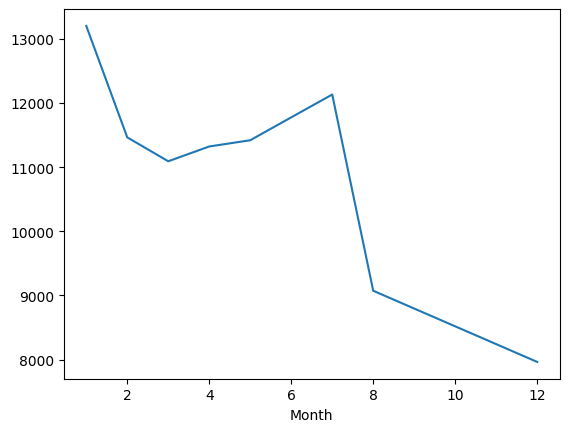

In [101]:
byMonth['twp'].plot()


**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

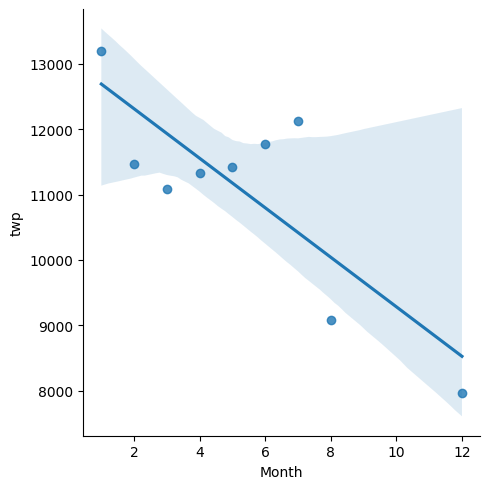

In [103]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [104]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

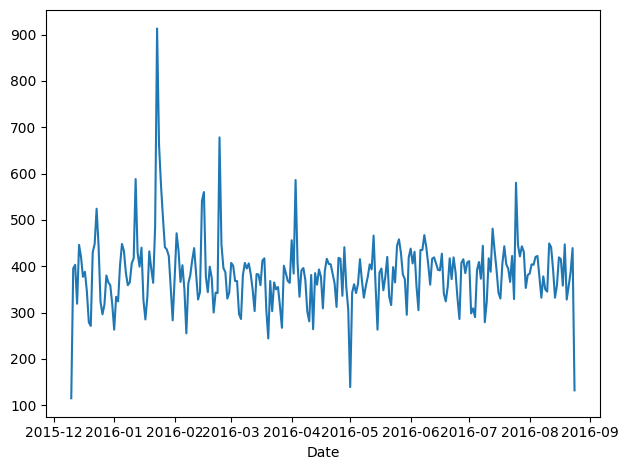

In [105]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

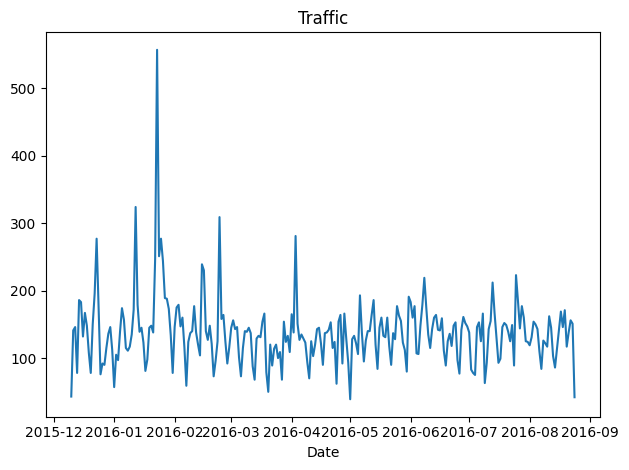

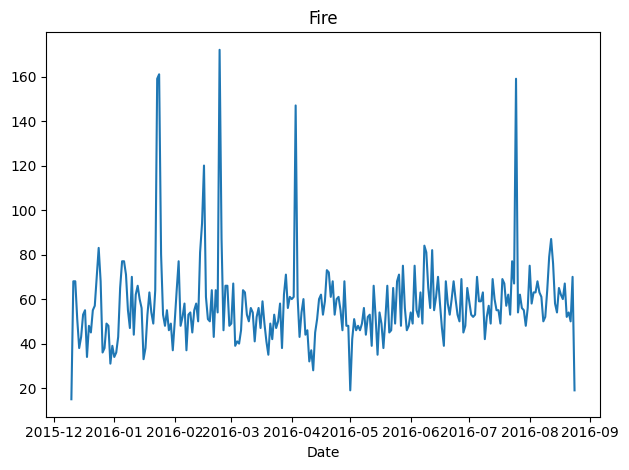

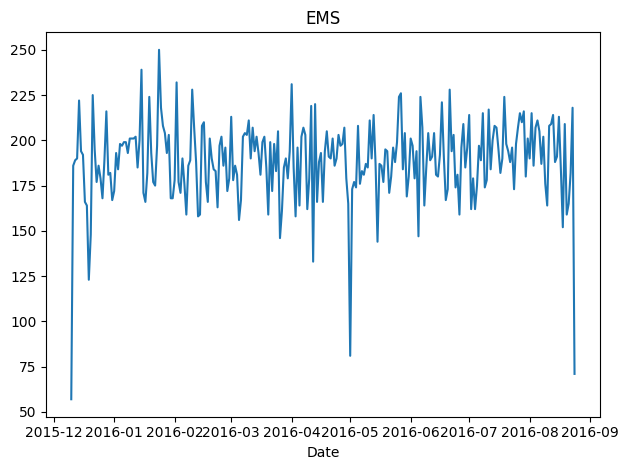

In [107]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.show()

df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.show()

df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.show()


**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [121]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Now create a HeatMap using this new DataFrame**

<Axes: xlabel='Hour', ylabel='Day of Week'>

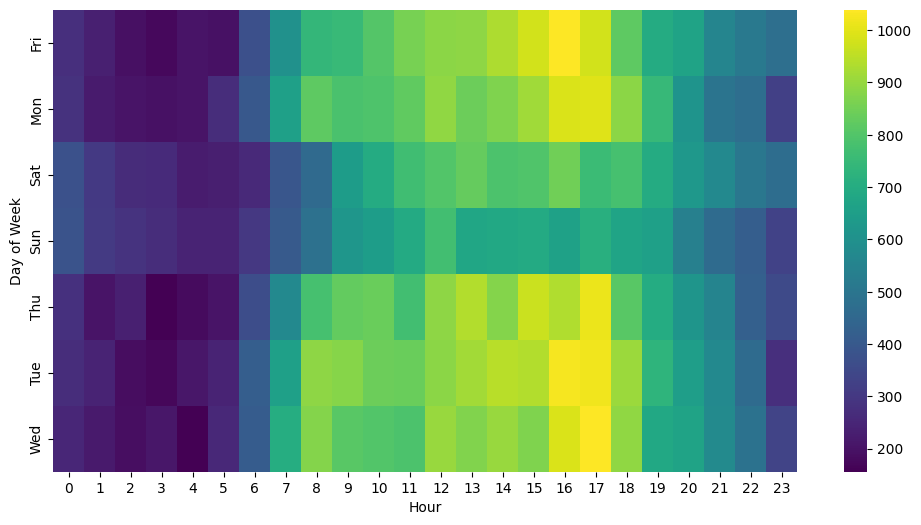

In [122]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')


## Geospatial Analysis

Now let's explore the spatial distribution of 911 calls using the `lat` (latitude) and `lng` (longitude) features.


### Basic Location Plot

**Plot a scatter plot of all 911 call locations using `lat` and `lng`.**
- Hint: Use `plt.scatter()` or Seaborn’s `sns.scatterplot()`.


In [124]:
df['lat'] = df['lat'].astype(float)
df['lng'] = df['lng'].astype(float)


**Do you notice any clusters or concentration of calls in particular areas? Describe your observations.**


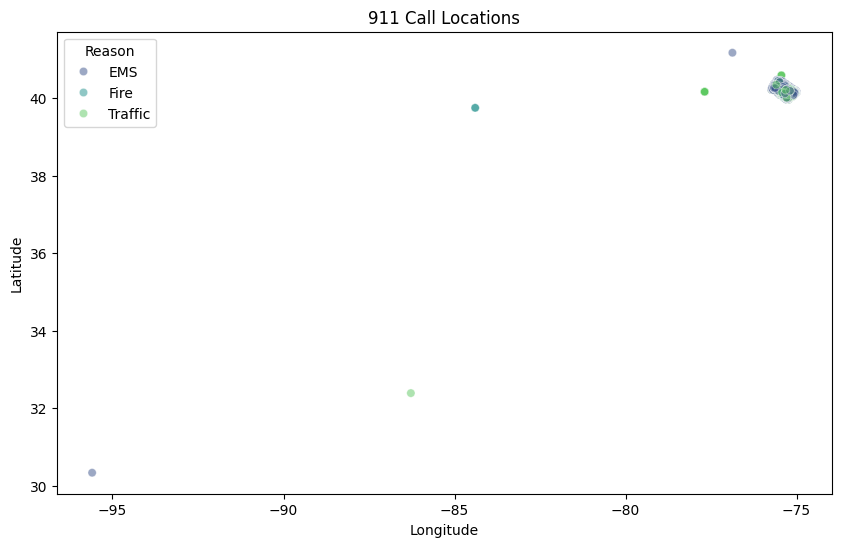

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lng', y='lat', data=df, hue='Reason', palette='viridis', alpha=0.5)
plt.title('911 Call Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Time-based Call Analysis in a Specific Township or Zip Code

### Step 1: Convert `timeStamp` to datetime

We first convert the `timeStamp` column to a proper datetime object so we can extract hour and day information.


In [127]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### Step 2: Extract hour and day of the week

Now we extract the hour of the day and the name of the weekday from each call's timestamp.


In [128]:
df['hour'] = df['timeStamp'].dt.hour
df['day_of_week'] = df['timeStamp'].dt.day_name()

### Step 3: Filter for a specific township

Let’s choose one township, for example `'NORRISTOWN'`, and filter the data to only include calls from that area.


In [129]:
twp_filter = 'NORRISTOWN'
df_twp = df[df['twp'] == twp_filter]


### Step 4: Create a pivot table of call counts
We group the data by day of the week and hour, then convert it into a table format suitable for heatmapping.


In [131]:
dayHour_twp = df_twp.groupby(by=['day_of_week', 'hour']).count()['Reason'].unstack()
dayHour_twp.head()


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,16,28,11,19,12,10,15,24,42,42,...,49,56,56,61,35,43,44,29,43,42
Monday,32,26,19,19,9,18,16,28,35,51,...,55,50,55,58,52,49,38,25,31,25
Saturday,33,26,18,18,21,13,17,24,22,35,...,37,38,42,45,50,43,45,34,40,33
Sunday,37,27,25,30,13,22,20,22,31,47,...,25,36,41,37,48,47,34,47,36,35
Thursday,28,17,15,11,13,11,23,36,38,53,...,36,38,42,52,44,34,54,49,24,20


In [133]:
heatmap_data = df_twp.groupby(['day_of_week', 'hour']).size().unstack().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

### Step 5: Plot a heatmap

Finally, visualize the call frequency by hour and day using a heatmap.


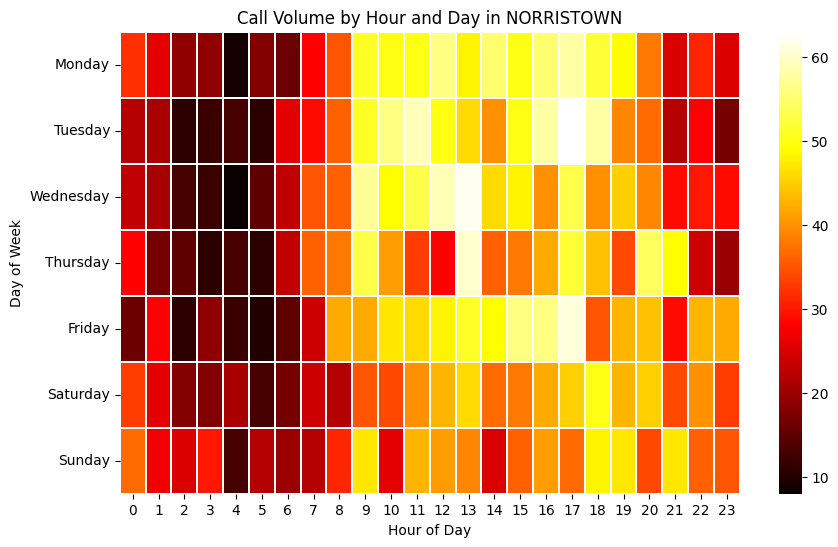

In [151]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='hot', linewidths= .05)
plt.title(f'Call Volume by Hour and Day in {twp_filter}')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


In [ ]:
# your code goes here
#
#

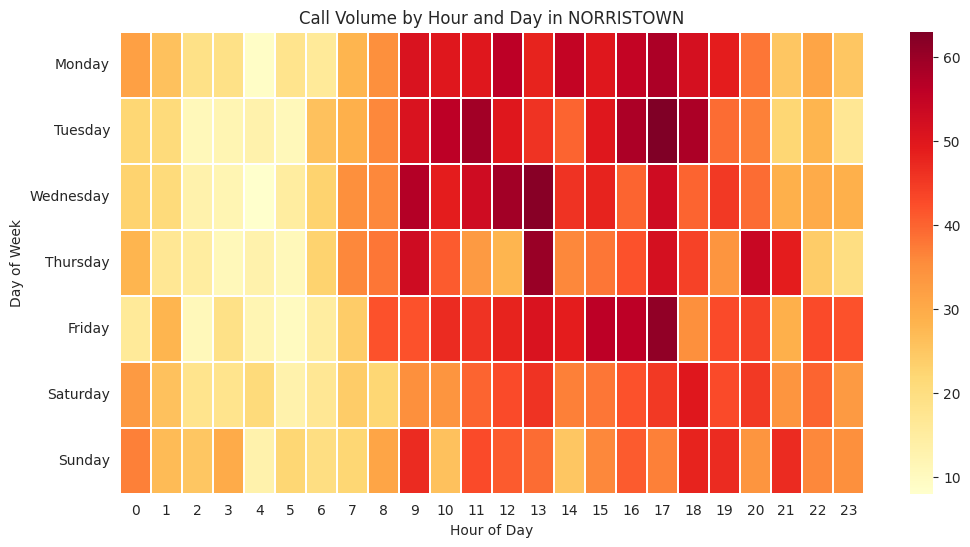